In [1]:
#Importamos librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Importamos el data set del mall
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Separamos el ingreso anual y el score
X = df.ix[:,[3,4]].values

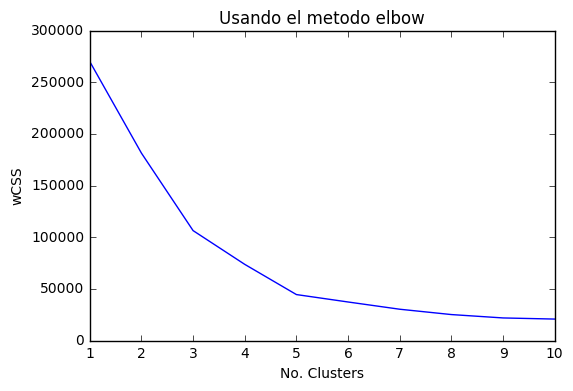

In [6]:
#Usamos el metodo elbow para encontrar el numero optimo de clusters
from sklearn.cluster import KMeans
wCSS = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wCSS.append(kmeans.inertia_)
plt.plot(range(1,11),wCSS)
plt.title("Usando el metodo elbow")
plt.xlabel("No. Clusters")
plt.ylabel("wCSS")
plt.show()

In [7]:
#Aplicando el numero de cluster correctos 5
kmeans = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [8]:
y_kmeans

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3, 0, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1])

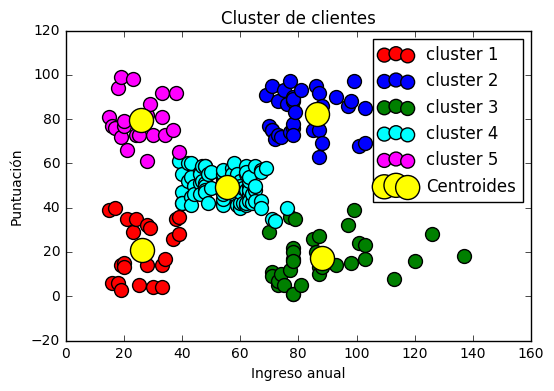

In [11]:
#Visualización de resultados

plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0, 1], s = 100, c= 'red', label='cluster 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1, 1], s = 100, c= 'blue', label='cluster 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2, 1], s = 100, c= 'green', label='cluster 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3, 1], s = 100, c= 'cyan', label='cluster 4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4, 1], s = 100, c= 'magenta', label='cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroides')
plt.title("Cluster de clientes")
plt.xlabel("Ingreso anual")
plt.ylabel("Puntuación de Gastos")
plt.legend()
plt.show()